In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [2]:
os.getcwd() # jupyter 위치

'D:\\workspace\\Exam\\시험(10월 23일)'

In [3]:
os.chdir('D:\\workspace\\Exam\\시험(10월 23일)\\bike-sharing-demand') # 기본 주소

In [4]:
# csv 파일을 불러옵니다.
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [135]:
# 원본 파일이 훼손되지 않도록 copy합니다.
train1 = train.copy()
test1 = test.copy()

In [136]:
# train 데이터를 확인합니다. 10886 * 12
train
# 봐야할 것: season = 1은 봄을 의미하는 데, 1월이 봄인가?-> 자세한 값을 살펴보자

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [137]:
# test 데이터를 확인합니다.
test 6493 * 9
# 봐야할 것: season = 1은 봄을 의미하는데, 12월 조차도 1로 되어있다. 확인 필요함

SyntaxError: invalid syntax (<ipython-input-137-0468aac1b1f0>, line 2)

In [138]:
# train 데이터의 기본 정보와 결측값을 확인합니다.
train.info()

print('\n', 'train null 값 확인', '\n\n',train.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB

 train null 값 확인 

 datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64


In [139]:
# test 데이터의 기본 정보와 결측값을 확인합니다.
test.info()

print('\n', 'test null 값 확인','\n\n',test.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
datetime      6493 non-null object
season        6493 non-null int64
holiday       6493 non-null int64
workingday    6493 non-null int64
weather       6493 non-null int64
temp          6493 non-null float64
atemp         6493 non-null float64
humidity      6493 non-null int64
windspeed     6493 non-null float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB

 test null 값 확인 

 datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64


In [140]:
# datetime 인덱스를 설정합니다.
train1['datetime'] = pd.to_datetime(train1['datetime'])
train1 = train1.set_index('datetime')

test1['datetime'] = pd.to_datetime(test1['datetime'])
test1 = test1.set_index('datetime')

In [141]:
# year, month, day, hour 변수를 만듭니다
train1['year'] = train1.index.year
train1['month'] = train1.index.month
train1['day'] = train1.index.day
train1['hour'] = train1.index.hour

test1['year'] = test1.index.year
test1['month'] = test1.index.month
test1['day'] = test1.index.day
test1['hour'] = test1.index.hour

[Text(0.5, 0, 'hour'), Text(0.5, 1.0, 'hour-rent')]

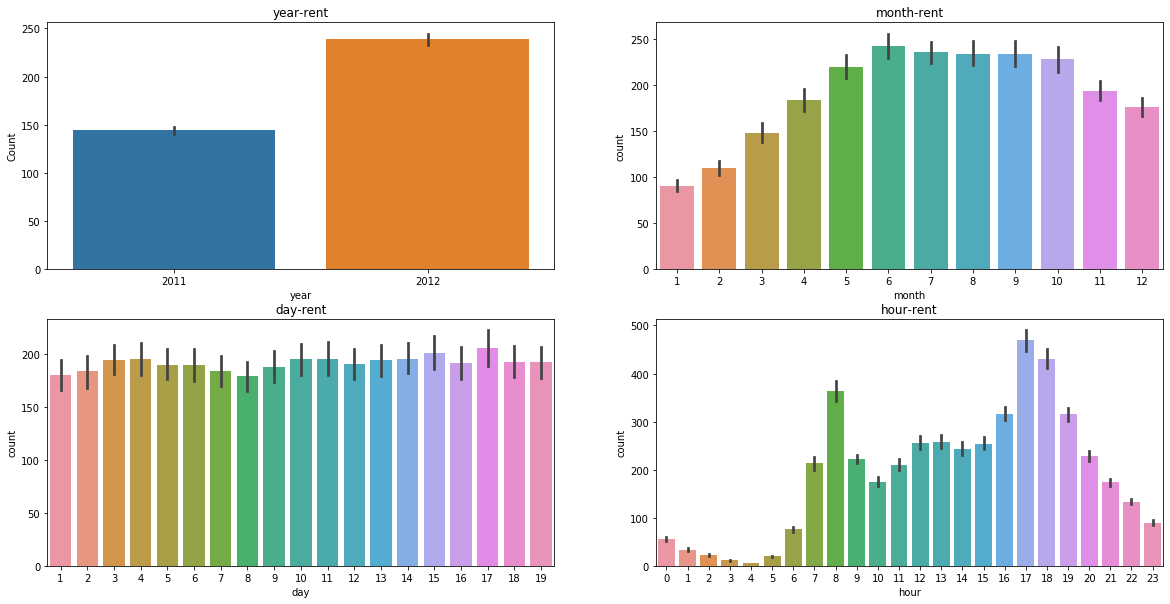

In [142]:
# train 데이터의 시각화
figure, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(20,10)

sns.barplot(data=train1, x="year", y="count", ax=ax1)
sns.barplot(data=train1, x="month", y="count", ax=ax2)
sns.barplot(data=train1, x="day", y="count", ax=ax3)
sns.barplot(data=train1, x="hour", y="count", ax=ax4)

ax1.set(ylabel='Count',title="year-rent")
ax2.set(xlabel='month',title="month-rent")
ax3.set(xlabel='day', title="day-rent")
ax4.set(xlabel='hour', title="hour-rent")

## train 데이터 정리
- 2011년에 비해, 2012년이 어림상 0.5배 넘게 증가
- 1월에서 최저점이었지만, 6월까지 대여량 상승 그 뒤, 연말까지 계속 줄어들음.
- 1일부터 19일까지만 데이터 존재. 나머지는 test에 존재. day는 여타 그래프와 달리 편차가 많이 없는 것처럼 보이나 평일과 주말을 나눠볼 수도 있음
- 4시에 가장 최저점. 8시와 17-18시가 가장 높은 것을 봐서는 자전거 대여량이 출퇴근 시간과 관계가 있을 수도 있다. 


- 해야할 것: working day와 비 working day의 총 대여량 비교, 시간별 대여량 비교

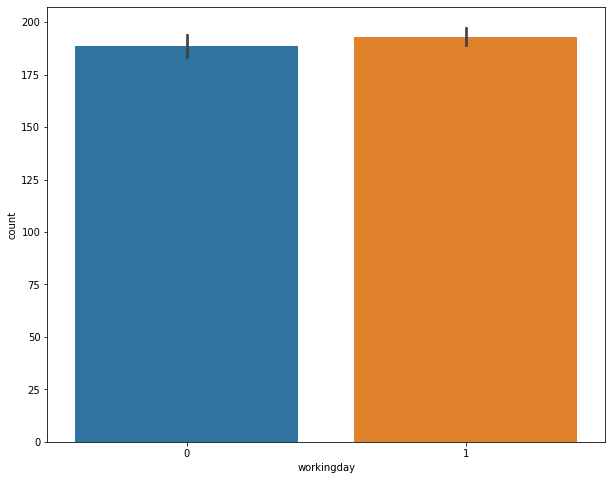

In [143]:
# working day와 비 working day의 총 대여량 비교
plt.figure(figsize=(10,8))
sns.barplot(x = train1['workingday'], y = train1['count'])

In [144]:
# 일하는 날의 데이터 프레임과 일하지 않는 날의 데이터 프레임으로 나눔.
train1_non_working = train1[train1['workingday'] ==0]
train1_working = train1[train1['workingday'] ==1]

[Text(0.5, 0, 'hour'), Text(0.5, 1.0, 'non_working_rent_hour')]

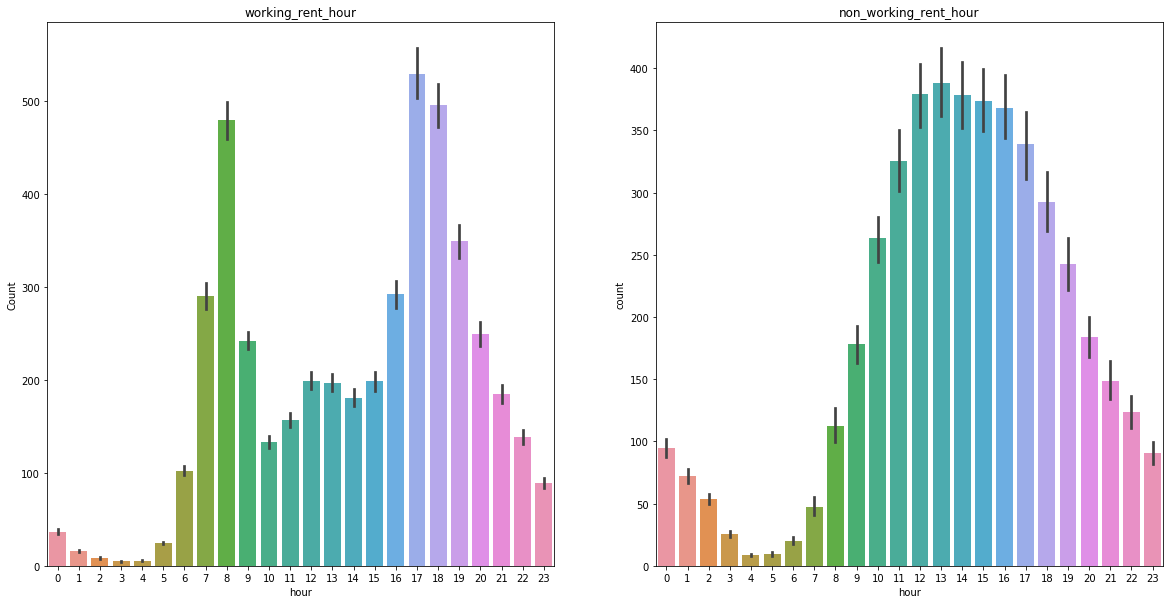

In [145]:
# 일하는 날, 일하지 않는 날 자전거 대여량 시간별 비교 시각화
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(20,10)

sns.barplot(data=train1_working, x="hour", y="count", ax=ax1)
sns.barplot(data=train1_non_working, x="hour", y="count", ax=ax2)

ax1.set(ylabel='Count',title="working_rent_hour")
ax2.set(xlabel='hour',title="non_working_rent_hour")

## 일하는 날과 일하지 않는 날 비교
- working day와 비 working day는 총 대여량에서는 눈에 띄는 차이가 없었다.
- 하지만 대여량이 증가하는 시간대는 확연히 달랐다.
- working day에는 출퇴근 시간에 맞물린, 8시와 17-18시가 가장 컸고
- 비 working day는 13-14시를 기점으로 피라미드 형태를 보여주었다.

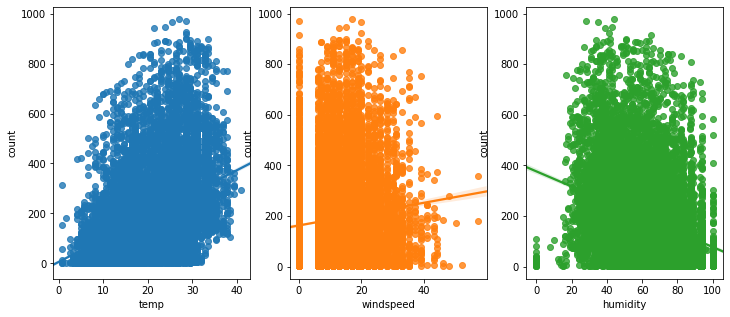

In [146]:
# 온도, 풍속, 습도와 count의 관계량 비교
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12, 5)
sns.regplot(x="temp", y="count", data=train1,ax=ax1)
sns.regplot(x="windspeed", y="count", data=train1,ax=ax2)
sns.regplot(x="humidity", y="count", data=train1,ax=ax3)

## 온도, 풍속, 습도와 대여량의 관계
- 20~30도 사이에서 대여량이 가장 많았고, 약한 양의 관계를 보여준다.
- 바람이 적을 때, 대여량이 많았으며, 0을 가진 값이 많다. 아마 null값 대신으로 채운 것이 아닌가 싶다
- 솝도가 35-50 사이가 가장 많았다.

In [147]:
# 머신러닝으로 풍속 예측
from sklearn.ensemble import RandomForestClassifier

def predict_windspeed(data):
    
    # 풍속이 0인것과 아닌 것을 나누어 줌
    dataWind0 = data.loc[data['windspeed'] == 0]
    dataWindNot0 = data.loc[data['windspeed'] != 0]
    
    # 풍속을 예측할 피처를 선택
    wCol = ["season", "weather", "humidity", "month", "temp", "year", "atemp"]

    # 풍속이 0이 아닌 데이터들의 타입을 스트링으로 바꿔준다.
    dataWindNot0["windspeed"] = dataWindNot0["windspeed"].astype("str")

    # 랜덤포레스트 분류기를 사용한다.
    rfModel_wind = RandomForestClassifier()

    # wCol에 있는 피처의 값을 바탕으로 풍속을 학습시킨다.
    rfModel_wind.fit(dataWindNot0[wCol], dataWindNot0["windspeed"])

    # 학습한 값을 바탕으로 풍속이 0으로 기록 된 데이터의 풍속을 예측한다.
    wind0Values = rfModel_wind.predict(X = dataWind0[wCol])

    # 값을 다 예측 후 비교해 보기 위해
    # 예측한 값을 넣어 줄 데이터 프레임을 새로 만든다.
    predictWind0 = dataWind0
    predictWindNot0 = dataWindNot0

    # 값이 0으로 기록 된 풍속에 대해 예측한 값을 넣어준다.
    predictWind0["windspeed"] = wind0Values

    # dataWindNot0 0이 아닌 풍속이 있는 데이터프레임에 예측한 값이 있는 데이터프레임을 합쳐준다.
    data = predictWindNot0.append(predictWind0)

    # 풍속의 데이터타입을 float으로 지정해 준다.
    data["windspeed"] = data["windspeed"].astype("float")

    
    return data

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


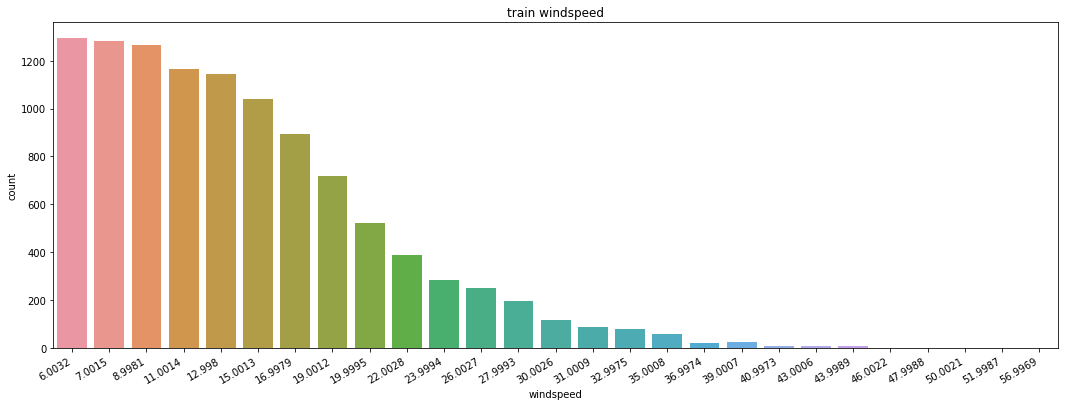

In [148]:
# 0값을 조정한다.
train1 = predict_windspeed(train1)


# widspeed 의 0값을 조정한 데이터를 시각화
fig, ax1 = plt.subplots()
fig.set_size_inches(18,6)

plt.sca(ax1)
plt.xticks(rotation=30, ha='right')
ax1.set(ylabel='Count',title="train windspeed")
sns.countplot(data=train1, x="windspeed", ax=ax1)

In [149]:
# 테스트 데이터도 진행
test1= predict_windspeed(test1)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [150]:
train1[['month', 'season']].head(50) # 1월이 봄? 

,month,season
datetime,,
2011-01-01 05:00:00,1,1
2011-01-01 10:00:00,1,1
2011-01-01 11:00:00,1,1
2011-01-01 12:00:00,1,1
2011-01-01 13:00:00,1,1
2011-01-01 14:00:00,1,1
2011-01-01 15:00:00,1,1
2011-01-01 16:00:00,1,1
2011-01-01 17:00:00,1,1


In [151]:
test1[['month', 'season']].tail(50) # 12월이 봄?

,month,season
datetime,,
2012-11-29 09:00:00,11,4
2012-11-29 23:00:00,11,4
2012-11-30 02:00:00,11,4
2012-11-30 03:00:00,11,4
2012-11-30 04:00:00,11,4
2012-11-30 05:00:00,11,4
2012-11-30 06:00:00,11,4
2012-11-30 07:00:00,11,4
2012-11-30 10:00:00,11,4


In [152]:
# 계절 수정해주기

def badToRight(month):
    if month in [12,1,2]:
        return 4
    elif month in [3,4,5]:
        return 1
    elif month in [6,7,8]:
        return 2
    elif month in [9,10,11]:
        return 3
train1['season'] = train1.month.apply(badToRight)
test1['season'] =test1.month.apply(badToRight)

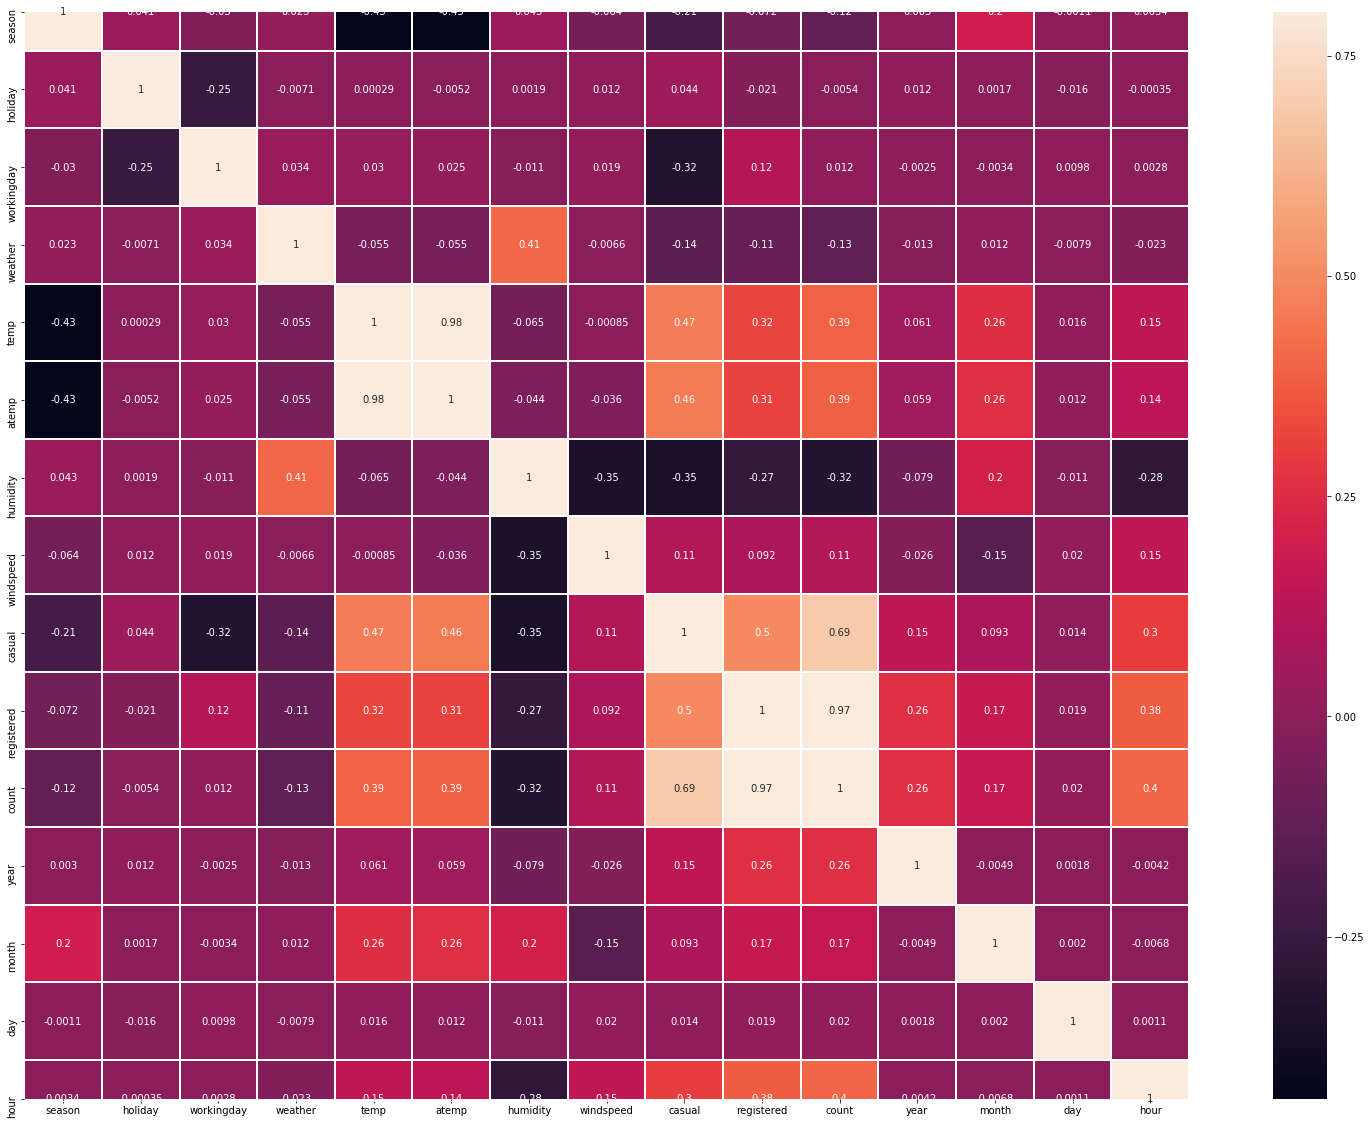

In [153]:
# heatmap을 이용해 관련성있는 것을 찾기
fig = plt.figure(figsize=(30,20))
ax = sns.heatmap(train1.corr(), vmax=.8, square=True,annot=True, linewidths=1)

## heatmap
- temp와 atemp는 관련성이 깊음. 둘 중에 하나만
- season과 temp, atemp도 관련성이 깊음. 빼야하나?
- count와 연관성이 있어 보이는 것은 온도와 시간,습도 정도임.(registered와 casual 제외)

In [156]:
# 연속형 feature와 범주형 feature
# 범주형 feature의 type을 category로 변경 해 준다.
categorical_feature_names = ["season","holiday","workingday","month","year","hour"]

for var in categorical_feature_names:
    train1[var] = train1[var].astype("category")
    test1[var] = test1[var].astype("category")
    
feature_names = ["season", "temp", "humidity","month", "year", "hour", "holiday", "workingday"]

feature_names

['season',
 'temp',
 'humidity',
 'month',
 'year',
 'hour',
 'holiday',
 'workingday']

In [168]:
# X_train과 X_test의 feature를 설정
X_train = train1[feature_names]
X_test = test1[feature_names]

In [169]:
# y_train 분리
label_name = "count"
y_train = train1[label_name]

In [170]:
# log를 사용한 랜덤 포레스트 
from sklearn.ensemble import RandomForestRegressor
rfModel = RandomForestRegressor(n_estimators=100)

# 0에 가까우면 무한대의 음수와 가까워짐으로 x+1을 한 np.log1p를 사용
y_train_log = np.log1p(y_train)
rfModel.fit(X_train, y_train_log)

preds = rfModel.predict(X_test)
print('완료했습니다')

완료했습니다


In [172]:
# submission 만들기
submission = pd.read_csv("sampleSubmission.csv")
submission

submission["count"] = np.exp(preds)

submission.head()

,datetime,count
0,2011-01-20 00:00:00,10.400928
1,2011-01-20 01:00:00,4.544724
2,2011-01-20 02:00:00,3.614070
3,2011-01-20 03:00:00,6.871821
4,2011-01-20 04:00:00,36.798240
